<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [ ['$','$'], ["\\(","\\)"] ],
      processEscapes: true
    }
  });
</script>

<script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>

# 动手学深度学习

## 1. 数据操作

In [1]:
import torch
x = torch.arange(12) #新建一个包含1-12元素的行向量
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
x.shape #通过shape访问张量的形状

torch.Size([12])

In [3]:
x.numel() #通过numel访问张量的元素总数

12

In [5]:
#通过reshape改变张量的形状，如果某个维度指定为-1则由张量自动推导该维度的大小
#改变张量形状的操作还有view，但是view操作要求张量必须是contiguous的。
#具体解释参考 https://blog.csdn.net/Flag_ing/article/details/109129752
x = x.reshape(3,4) 
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros((2,3,4)) #创建全0张量

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4)) #创建全1张量

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn((2,3,4)) #创建符合标准正态分布的张量

tensor([[[-0.1776, -0.8917,  2.8491,  0.9745],
         [ 0.4001, -1.7007,  1.6900, -1.7066],
         [ 0.4335, -0.4264, -0.2784,  0.5509]],

        [[-0.3310, -1.0249, -0.6260, -0.3829],
         [-0.8233, -0.0551, -0.5874,  0.5543],
         [-0.4602, -0.0361, -1.1674,  0.6501]]])

In [9]:
torch.tensor([[2,1,4,3],[3,2,4,1],[3,2,3,4]])

tensor([[2, 1, 4, 3],
        [3, 2, 4, 1],
        [3, 2, 3, 4]])

In [10]:
#标准算术运算, 逐元素操作
x = torch.tensor([1.2, 3, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y 

(tensor([ 3.2000,  5.0000,  6.0000, 10.0000]),
 tensor([-0.8000,  1.0000,  2.0000,  6.0000]),
 tensor([ 2.4000,  6.0000,  8.0000, 16.0000]),
 tensor([0.6000, 1.5000, 2.0000, 4.0000]),
 tensor([ 1.4400,  9.0000, 16.0000, 64.0000]))

In [11]:
torch.exp(y) # 求幂运算， 每个元素等于e的y_i次幂

tensor([7.3891, 7.3891, 7.3891, 7.3891])

In [28]:
# 级联
X = torch.arange(12,dtype = torch.float32).reshape(3,4)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
X, Y, torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [29]:
X == Y # 判断对应元素是否相等

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [30]:
X.sum() #对所有元素求和

tensor(66.)

In [31]:
#广播机制
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [34]:
# 索引和切片 X[start:stop:stride,...], -1表示最后一个元素，‘-’号表示逆序
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [36]:
X[0:2, :] = 12 # 通过索引赋值
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [39]:
X[1,2] = 9
X

tensor([[12., 12., 12., 12.],
        [12., 12.,  9., 12.],
        [ 8.,  9., 10., 11.]])

In [48]:
# 内存分配问题， 有些操作会导致内存重新分配
# 编程时，我们不想总是不必要地分配内存，而是希望原地执行更新。
# 不原地更新会出现两个问题：
# （1）浪费内存;
# （2）如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。

X = torch.arange(12,dtype = torch.float32).reshape(3,4)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])

print('id(Y): ', id(Y))

Y = X + Y 

print('id(Y): ', id(Y))

id(Y):  139747107784256
id(Y):  139747110402624


In [51]:
# 重新分配内存，然后在新内存上进行原地更新，保留原来的内存分配
Z = torch.zeros_like(Y)

print('id(Y): ', id(Y))
print('id(Z): ', id(Z))

Z[:] = X + Y 

print('id(Y): ', id(Y))
print('id(Z): ', id(Z))

id(Y):  139747110402624
id(Z):  139747106452032
id(Y):  139747110402624
id(Z):  139747106452032


In [53]:
# 如果确定后续计算不再使用Y，可以将其覆盖以较少内存开销
print(Y)
print('id(Y): ', id(Y))

Y[:] = X + Y # 或 Y += X

print(Y)
print('id(Y): ', id(Y))

tensor([[ 2.,  3.,  8.,  9.],
        [ 9., 12., 15., 18.],
        [20., 21., 22., 23.]])
id(Y):  139747110402624
tensor([[ 2.,  4., 10., 12.],
        [13., 17., 21., 25.],
        [28., 30., 32., 34.]])
id(Y):  139747110402624


In [54]:
# NumPy 张量与PyTorch张量的转换， 转换后的结果不共享内存
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [60]:
# item()将大小为1的张量转换为 Python 标量, 大小不为1会报错
a = torch.tensor([2.3])
a, a.item(), float(a), int(a)

(tensor([2.3000]), 2.299999952316284, 2.299999952316284, 2)

## 2. 数据预处理

In [62]:
# 创建数据集
import os

os.makedirs(os.path.join('.','data'),exist_ok=True)
data_file = os.path.join('.','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms, Alley, Price\n')
    f.write('NA, Pave, 127500\n')
    f.write('2, NA, 106000\n')
    f.write('4, NA, 178200\n')
    f.write('NA, NA, 140000\n')

In [64]:
import pandas as pd 

data = pd.read_csv(data_file)
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       2.0     NA  106000
2       4.0     NA  178200
3       NaN     NA  140000


In [65]:
# 处理缺失值
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  Alley
0       3.0   Pave
1       2.0     NA
2       4.0     NA
3       3.0     NA


In [66]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms   Alley_ NA   Alley_ Pave   Alley_nan
0       3.0           0             1           0
1       2.0           1             0           0
2       4.0           1             0           0
3       3.0           1             0           0


In [67]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 0., 1., 0.],
         [2., 1., 0., 0.],
         [4., 1., 0., 0.],
         [3., 1., 0., 0.]], dtype=torch.float64),
 tensor([127500, 106000, 178200, 140000]))

## 3. 线性代数

In [68]:
# 标量
import torch

x = torch.tensor([3.0])
y = torch.tensor([2.0])

x + y, x - y, x * y, x / y, x ** y

(tensor([5.]), tensor([1.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [85]:
# 向量
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [86]:
# 通过索引访问元素
x[1]

tensor(1)

In [87]:
# 长度
len(x)

4

In [88]:
# 形状
x.shape

torch.Size([4])

In [89]:
# 维数
x.dim()

1

In [90]:
# 矩阵
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [91]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [92]:
# 对称矩阵
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B, B == B.T 

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

In [93]:
# 张量
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [94]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone() # 通过分配新内存，将A的副本分配给B
A, A + B 

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [95]:
# 哈达玛积（Hadamard product）
A * B 

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [108]:
a = 2
X = torch.arange(24,dtype=torch.float32).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9.],
          [10., 11., 12., 13.]],
 
         [[14., 15., 16., 17.],
          [18., 19., 20., 21.],
          [22., 23., 24., 25.]]]),
 torch.Size([2, 3, 4]))

In [109]:
# 求和
X.sum()

tensor(276.)

In [110]:
# 指定维度求和
X

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [111]:
X_sum_axis0 = X.sum(axis=0)
X_sum_axis0, X_sum_axis0.shape

(tensor([[12., 14., 16., 18.],
         [20., 22., 24., 26.],
         [28., 30., 32., 34.]]),
 torch.Size([3, 4]))

In [112]:
X_sum_axis1 = X.sum(axis=1)
X_sum_axis1, X_sum_axis1.shape

(tensor([[12., 15., 18., 21.],
         [48., 51., 54., 57.]]),
 torch.Size([2, 4]))

In [113]:
X_sum_axis2 = X.sum(axis=2)
X_sum_axis2, X_sum_axis2.shape

(tensor([[ 6., 22., 38.],
         [54., 70., 86.]]),
 torch.Size([2, 3]))

In [114]:
X.sum(axis=[0,2])

tensor([ 60.,  92., 124.])

In [115]:
# 求均值
X.mean(), X.sum() / X.numel()

(tensor(11.5000), tensor(11.5000))

In [118]:
# 沿指定轴求均值
X.mean(axis=0), X.sum(axis=0), X.sum(axis=0) / X.shape[0]

(tensor([[ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.],
         [14., 15., 16., 17.]]),
 tensor([[12., 14., 16., 18.],
         [20., 22., 24., 26.],
         [28., 30., 32., 34.]]),
 tensor([[ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.],
         [14., 15., 16., 17.]]))

In [120]:
# 非汇总求和, 保持轴数不变，方便广播运算
sum_X = X.sum(axis=-1, keepdims=True)
sum_X

tensor([[[ 6.],
         [22.],
         [38.]],

        [[54.],
         [70.],
         [86.]]])

In [121]:
X / sum_X

tensor([[[0.0000, 0.1667, 0.3333, 0.5000],
         [0.1818, 0.2273, 0.2727, 0.3182],
         [0.2105, 0.2368, 0.2632, 0.2895]],

        [[0.2222, 0.2407, 0.2593, 0.2778],
         [0.2286, 0.2429, 0.2571, 0.2714],
         [0.2326, 0.2442, 0.2558, 0.2674]]])

In [122]:
# 沿某个轴计算 A 元素的累积总和
X.cumsum(axis=-1)

tensor([[[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.]],

        [[12., 25., 39., 54.],
         [16., 33., 51., 70.],
         [20., 41., 63., 86.]]])

In [123]:
# 点积
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [124]:
torch.sum(x * y)

tensor(6.)

In [128]:
# 矩阵-向量积
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
x = torch.arange(4,dtype=torch.float32)
A, x, A * x, torch.mv(A, x)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 tensor([[ 0.,  1.,  4.,  9.],
         [ 0.,  5., 12., 21.],
         [ 0.,  9., 20., 33.],
         [ 0., 13., 28., 45.],
         [ 0., 17., 36., 57.]]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

In [131]:
A = torch.arange(20,dtype=torch.float32).reshape(4, 5)
B = torch.arange(10,dtype=torch.float32).reshape(5,2)
torch.mm(A, B)

tensor([[ 60.,  70.],
        [160., 195.],
        [260., 320.],
        [360., 445.]])

In [132]:
# 范数(2范数)
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [133]:
# 1范数
torch.abs(u).sum()

tensor(7.)

In [134]:
# 2范数推广到张量则为弗罗贝尼乌斯范数（Frobenius norm）
torch.norm(torch.ones(3,4,9))

tensor(10.3923)

## 4. 微分

导数的定义：

$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$


In [5]:
%matplotlib inline
import numpy as np 
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [6]:
def numerical_lim(f,x,h):
    return (f(x + h) - f(x)) / h 

h = 0.1
for i in range(10):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f,1,h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000


$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

常见函数求微分：

+ $DC = 0$ （C是一个常数）
+ $Dx^n = nx^{n-1}$ （幂律（power rule）,  n 是任意实数）
+ $De^x = e^x$
+ $D\ln(x) = 1/x$

求导法则:

1. 常数相乘法则： $\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$

2. 加法法则： $\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$

3. 乘法法则： $\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$

4. 除法法则： $\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$


偏导数定义：

$$
\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.
$$

梯度：

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。

$$
\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,
$$

假设 x 为 n 维向量，在微分多元函数时经常使用以下规则:

* 对于所有 $\mathbf{A} \in \mathbb{R}^{m \times n}$ ，都有 $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有 $\mathbf{A} \in \mathbb{R}^{n \times m}$ ，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
* 对于所有 $\mathbf{A} \in \mathbb{R}^{n \times n}$ ，都有 $\\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

链式法则:

$$
\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}
$$

## 5. 自动求导

对函数$y = 2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导

In [8]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [9]:
x.requires_grad_(True)
x.grad # 默认值为None

In [10]:
y = 2 * torch.dot(x,x)
y 

tensor(28., grad_fn=<MulBackward0>)

In [11]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y = 2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$应为$4\mathbf{x}$。

In [12]:
x.grad == 4 * x 

tensor([True, True, True, True])

In [13]:
# 计算x的另一个函数。
# 默认情况下，PyTorch会累加梯度，因此需要清楚之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

非标量变量的反向传播

当‘y’不是标量时，向量‘y’关于向量x的导数的最自然解释是一个矩阵。对非标量调用‘backward’需要传入一个‘gradient’参数，该参数指定微分函数关于‘self’的梯度。在我们的例子中，我们只是想偏导数的和，所以传递一个1的梯度是合理的。

实际上，在深度学习中很少对非标量进行求导，都是先对‘y’求和得到一个标量再求导。


In [15]:
x.grad.zero_()
y = x * x 
y.sum().backward() # 等价于 y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

分离计算

有时候希望将某些计算移出计算图。例如，假设y是关于x的函数，z是关于y和x的函数，现在想计算z关于x的梯度，但是由于某种原因，希望将y作为常数，并且只考虑x在y被计算后发挥的作用。

该特性在迁移学习中冻结某些层的参数时用到。

In [16]:
x.grad.zero_()
y = x * x 
u = y.detach()
z = u * x 

z.sum().backward()
x.grad == u # ux关于x的导数为u

tensor([True, True, True, True])

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x 

tensor([True, True, True, True])

自动求导在Python控制流中依然适用

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b 
    else:
        c = 100 * b 
    return c

a = torch.randn(size=(), requires_grad=True) # size为空表示标量
d = f(a)
d.backward()
# 我们现在可以分析上面定义的 f 函数。请注意，它在其输入 a 中是分段线性的。
# 换言之，对于任何 a，存在某个常量标量 k，使得 f(a) = k * a，其中 k 的值取决于输入 a。
# 因此，d / a 允许我们验证梯度是否正确。
a.grad == d / a

tensor(True)

## 6. 概率

投骰子实验

In [25]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l 

In [34]:
# 抽样
# 为了抽取一个样本，我们只需传入一个概率向量。 
# 输出是另一个相同长度的向量：它在索引 i 处的值是采样结果对应于 i 的次数。
fair_probs = torch.ones(6) / 6
multinomial.Multinomial(1,fair_probs).sample() # 抽样1个样本

tensor([1., 0., 0., 0., 0., 0.])

In [35]:
multinomial.Multinomial(10,fair_probs).sample() # 抽样10个样本

tensor([1., 0., 2., 2., 3., 2.])

In [37]:
# 统计1000次投掷后, 每个数字被投中的次数
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1700, 0.1690, 0.1640, 0.1650, 0.1730, 0.1590])

tensor([[2., 1., 1., 0., 2., 4.],
        [0., 1., 1., 3., 4., 1.],
        [2., 1., 2., 1., 3., 1.],
        ...,
        [4., 0., 3., 1., 1., 1.],
        [1., 3., 1., 2., 1., 2.],
        [2., 2., 2., 0., 2., 2.]])
tensor([[  2.,   1.,   1.,   0.,   2.,   4.],
        [  2.,   2.,   2.,   3.,   6.,   5.],
        [  4.,   3.,   4.,   4.,   9.,   6.],
        ...,
        [841., 845., 809., 832., 839., 814.],
        [842., 848., 810., 834., 840., 816.],
        [844., 850., 812., 834., 842., 818.]])
tensor([[0.2000, 0.1000, 0.1000, 0.0000, 0.2000, 0.4000],
        [0.1000, 0.1000, 0.1000, 0.1500, 0.3000, 0.2500],
        [0.1333, 0.1000, 0.1333, 0.1333, 0.3000, 0.2000],
        ...,
        [0.1689, 0.1697, 0.1624, 0.1671, 0.1685, 0.1635],
        [0.1687, 0.1699, 0.1623, 0.1671, 0.1683, 0.1635],
        [0.1688, 0.1700, 0.1624, 0.1668, 0.1684, 0.1636]])


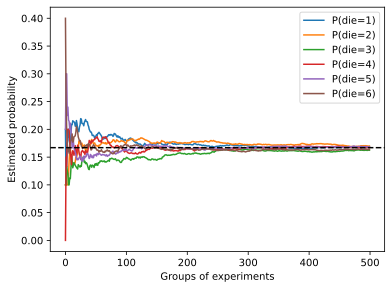

In [42]:
# 进行500组实验，每组抽取10个样本。
# 这些概率随着时间的推移收敛到真实概率
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)
print(estimates)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

概率论公理

在给定的样本空间$\mathcal{S}$中，事件$\mathcal{A}$的概率，表示为$P(\mathcal{A})
$，满足以下属性：

对于任意事件$\mathcal{A}$，其概率从不会是负数，即$P(\mathcal{A}) \geq 0$；

整个样本空间的概率为$1$ ，即$P(\mathcal{S}) = 1$；

对于任意事件$\mathcal{A}_1, \mathcal{A}_2, \ldots$的可数序列，这些事件互斥（mutually exclusive）（对于所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$），任何事件发生的概率等于它们各自发生的概率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)
$。

联合概率：$P(A = a, B=b)$

条件概率：$P(B=b \mid A=a)$

贝叶斯定理：$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$

边际化：$P(B) = \sum_{A} P(A, B)$

独立性：$P(A, B) = P(A)P(B)$

期望：$E[X] = \sum_{x} x P(X = x)$

方差：$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] = E[X^2] - E[X]^2.$

## 7. 线性回归的从零实现

$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$

In [3]:
%matplotlib inline 
import torch
import random
from d2l import torch as d2l 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [4]:
# 合成数据集
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声 """
    X = torch.normal(0,1,(num_examples, len(w)))
    y = torch.matmul(X, w) + b 
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, num_examples=1000)

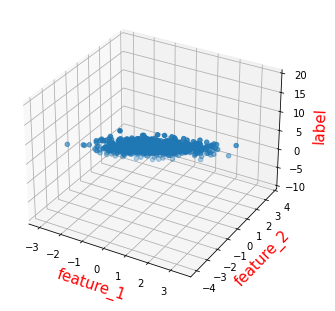

In [6]:
# 数据可视化
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0].detach().numpy(), features[:,1].detach().numpy(), labels.detach().numpy())
ax.set_zlabel('label', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('feature_2', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('feature_1', fontdict={'size': 15, 'color': 'red'})
plt.show()

In [7]:
# 读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 打乱索引
    for i in range(0, num_examples, batch_size):
        #最后一个batch不一定能装满
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
# 展示一个batch
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.3470, -0.5485],
        [-0.6963, -0.9799],
        [ 2.3245,  0.5735],
        [ 0.9638, -0.9616],
        [ 0.0920,  0.9754],
        [-0.9203, -1.0038],
        [-0.6330,  0.0471],
        [-1.1587, -0.5749],
        [-0.4255, -1.3455],
        [ 0.0090, -0.6006]]) 
 tensor([[8.7665],
        [6.1349],
        [6.9084],
        [9.3902],
        [1.0620],
        [5.7796],
        [2.7624],
        [3.8304],
        [7.9258],
        [6.2830]])


In [9]:
# 初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [10]:
# 定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [11]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [12]:
# 定义优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
# 训练
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000049
epoch 7, loss 0.000048
epoch 8, loss 0.000049
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0001, -0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0001], grad_fn=<RsubBackward1>)


## 8. 线性回归的PyTorch实现

In [16]:
import numpy as np 
import torch 
from torch.utils import data 

from d2l import torch as d2l 

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [17]:
# 读取数据
def load_array(data_arrays, batch_size, is_train=True):
    """构建一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10 
data_iter = load_array((features, labels),batch_size)

In [19]:
next(iter(data_iter))

[tensor([[ 0.5964,  1.3370],
         [ 1.9451, -1.2741],
         [-1.1285,  1.7982],
         [-0.4377,  1.0385],
         [-0.4762, -0.6764],
         [ 0.0553,  0.0553],
         [-0.9189,  0.2340],
         [-0.9293, -0.3977],
         [-0.6103, -0.1639],
         [ 0.9177, -0.5340]]),
 tensor([[ 0.8350],
         [12.4082],
         [-4.1862],
         [-0.2159],
         [ 5.5344],
         [ 4.1137],
         [ 1.5729],
         [ 3.7040],
         [ 3.5338],
         [ 7.8379]])]

In [20]:
# 定义模型
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [21]:
# 初始化模型参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [22]:
#  定义损失函数
loss = nn. MSELoss()

In [23]:
# 定义优化算法
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

In [24]:
# 训练
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000217
epoch 2, loss 0.000102
epoch 3, loss 0.000103
epoch 4, loss 0.000102
epoch 5, loss 0.000102
epoch 6, loss 0.000103
epoch 7, loss 0.000102
epoch 8, loss 0.000102
epoch 9, loss 0.000103
epoch 10, loss 0.000102


In [25]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0004,  0.0007])
b的估计误差： tensor([3.3379e-05])


## 9. softmax回归的从零实现

In [56]:
%matplotlib inline
import torch 
import torchvision
from torch.utils import data
from torchvision import transforms
from IPython import display
from d2l import torch as d2l


In [57]:
trans = transforms.ToTensor()
mnsit_train = torchvision.datasets.FashionMNIST(root='./data',train=True,transform=trans,download=False)
mnist_test = torchvision.datasets.FashionMNIST(root='./data',train=False,transform=trans,download=False)

In [58]:
batch_size = 256
train_iter = data.DataLoader(mnsit_train,batch_size,shuffle=True,num_workers=4)
test_iter = data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4)

In [59]:
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


In [60]:
# 初始化模型参数
num_inputs = 784
num_outputs = 10

W = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

定义softmax操作

$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$

In [61]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1,keepdim=True)
    return X_exp / partition

In [62]:
# 定义模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W) + b)

定义交叉熵损失函数

演示数据，其中包含2个样本在3个类别的预测概率y_hat。以及它们对应的标签y。 有了y，我们知道在第一个样本中，第一类是正确的预测，而在第二个样本中，第三类是正确的预测。 然后使用y作为y_hat中概率的索引，我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [63]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3,0.2,0.5]])
# [0,1]表示选择第一行和第二行，所以用range(len(y_hat))也是一样的
# y表示以[0,2]为索引选择列
y_hat[[0,1],y]  

tensor([0.1000, 0.5000])

$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j.$

In [64]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

定义准确率

首先，如果 y_hat 是矩阵，第二个维度存储每个类的预测分数。我们使用 argmax 获得每行中最大元素的索引来获得预测类别。然后我们将预测类别与真实 y 元素进行比较。由于等式运算符 == 对数据类型很敏感，因此我们将 y_hat 的数据类型转换为与 y 的数据类型一致。结果是一个包含 0（错）和 1（对）的张量。进行求和会得到正确预测的数量。

In [65]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3,0.2,0.5]])
y_hat.argmax(axis=1), y_hat.argmax(axis=1).type(y.dtype) == y, (y_hat.argmax(axis=1) == y).type(y.dtype), (y_hat.argmax(axis=1) == y).type(y.dtype).sum()

(tensor([2, 2]), tensor([False,  True]), tensor([0, 1]), tensor(1))

In [66]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y 
    return float(cmp.type(y.dtype).sum())

In [67]:
accuracy(y_hat, y) / len(y)

0.5

In [68]:
# 评估数据迭代器 data_iter 访问的数据集在任意模型 net 上的准确率

# 先定义累加器
class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def evaluate_accuracy(net, data_iter):
    """计算模型在指定数据集上的精度"""
    metric = Accumulator(2) # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X),y),y.numel())
    return metric[0] / metric[1]

In [69]:
evaluate_accuracy(net, test_iter)

0.1471

In [70]:
# 可视化训练过程实用程序类
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,ylim=None,xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,figsize=(3.5,2.5)):
        #增量绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows,ncols,figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

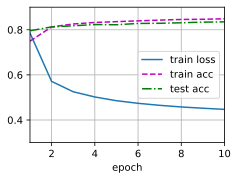

In [71]:
# 训练
lr = 0.1
num_epochs = 10

animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])

for epoch in range(num_epochs):
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = cross_entropy(y_hat, y)
        l.sum().backward()
        d2l.sgd([W,b],lr,batch_size)
        metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())
    test_acc = evaluate_accuracy(net, test_iter)
    # print(f'epch {epoch +1}, train loss {metric[0] / metric[2] :.5f}, train acc {metric[1] / metric[2] :.5f}, test acc {test_acc:.5f}')
    animator.add(epoch + 1, (metric[0] / metric[2], metric[1] / metric[2],test_acc,))


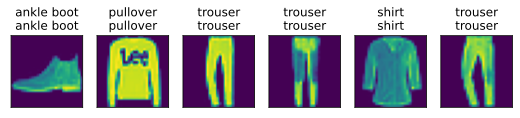

In [72]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）。"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## 10. softmax回归的PyTorch实现

In [1]:
import torch 
import torchvision
from torch.utils import data
from torchvision import transforms
from torch import nn 
from d2l import torch as d2l 

batch_size =256
trans = transforms.ToTensor()
mnsit_train = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=trans, download=False)
mnist_test = torchvision.datasets.FashionMNIST(root='./data',train=False,transform=trans,download=False)
train_iter = data.DataLoader(mnsit_train,batch_size,shuffle=True,num_workers=4)
test_iter = data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4)

In [2]:
# 定义模型
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

值得注意的一件事情：在多分类问题中，训练时模型输出往往不会进行softmax计算，而是直接送入交叉熵损失函数。

原因在于softmax的指数运算会造成数值稳定性问题。softmax函数 $\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，其中$\hat y_j$是预测的概率分布。 $o_j$是未归一化的预测$\mathbf{o}$的第$j$个元素。如果$o_k$中的一些数值非常大，那么$exp(o_k)$可能大于数据类型容许的最大数字（即 上溢（overflow））。这将使分母或分子变为inf（无穷大），我们最后遇到的是0、inf 或 nan（不是数字）的 $\hat y_j$。在这些情况下，我们不能得到一个明确定义的交叉熵的返回值。

即便在继续softmax计算之前，先从所有$o_k$中减去$max(o_k)$。你可以证明每个$o_k$按常数进行的移动不会改变softmax的返回值。在减法和归一化步骤之后，可能有些$o_j$具有较大的负值。由于精度受限，$exp(o_j)$将有接近零的值（即 下溢（underflow））。这些值可能会四舍五入为零，使$\hat y_j$为零，并且使得$log(\hat y_j)$的值为 -inf。反向传播几步后，我们可能会发现自己面对一屏幕可怕的nan结果。

通过将softmax和交叉熵结合在一起，避免计算$exp(o_j)$，而可以直接使用$o_j$，因为$log(exp(⋅)) $被抵消了。

$$
\begin{split}\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j)}{\sum_k \exp(o_k)}\right) \\
& = \log{(\exp(o_j))}-\log{\left( \sum_k \exp(o_k) \right)} \\
& = o_j -\log{\left( \sum_k \exp(o_k) \right)}.
\end{aligned}\end{split}
$$

In [3]:
loss = nn.CrossEntropyLoss()

In [4]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

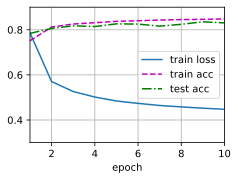

In [5]:
num_epochs = 10

animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])

for epoch in range(num_epochs):
    # 训练损失总和、训练准确度总和、样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        metric.add(float(l)*len(y),d2l.accuracy(y_hat,y),y.size().numel())
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    # print(f'epch {epoch +1}, train loss {metric[0] / metric[2] :.5f}, train acc {metric[1] / metric[2] :.5f}, test acc {test_acc:.5f}')
    animator.add(epoch + 1, (metric[0] / metric[2], metric[1] / metric[2],test_acc,))


## 11. 多层感知器的从零实现

In [8]:
num_inputs, num_hiddens, num_outputs = 784, 256, 10

W1 = nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1, b1, W2, b2]

In [9]:
#定义ReLU函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [13]:
# 定义模型
def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X @ W1 + b1) # 这里‘@’表示矩阵相乘
    return (H @ W2 + b2)

In [14]:
loss = nn.CrossEntropyLoss()

In [15]:
optimizer = torch.optim.SGD(params, lr=0.1)

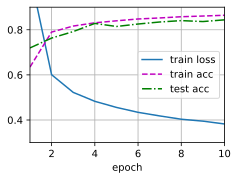

In [16]:
num_epochs = 10

animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])

for epoch in range(num_epochs):
    # 训练损失总和、训练准确度总和、样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        metric.add(float(l)*len(y),d2l.accuracy(y_hat,y),y.size().numel())
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    # print(f'epch {epoch +1}, train loss {metric[0] / metric[2] :.5f}, train acc {metric[1] / metric[2] :.5f}, test acc {test_acc:.5f}')
    animator.add(epoch + 1, (metric[0] / metric[2], metric[1] / metric[2],test_acc,))

## 12. 多层感知机的PyTorch实现

In [17]:
# 模型定义
net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
loss = nn.CrossEntropyLoss()

In [19]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

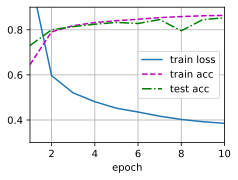

In [20]:
num_epochs = 10

animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])

for epoch in range(num_epochs):
    # 训练损失总和、训练准确度总和、样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        metric.add(float(l)*len(y),d2l.accuracy(y_hat,y),y.size().numel())
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    # print(f'epch {epoch +1}, train loss {metric[0] / metric[2] :.5f}, train acc {metric[1] / metric[2] :.5f}, test acc {test_acc:.5f}')
    animator.add(epoch + 1, (metric[0] / metric[2], metric[1] / metric[2],test_acc,))

## 13. 欠拟合与过拟合

以多项式回归为例演示模型选择中的欠拟合与过拟合问题。

$$
y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where}
\epsilon \sim \mathcal{N}(0, 0.1^2).
$$

In [30]:
import math 
import numpy as np 
import torch 
from torch import nn 
from d2l import torch as d2l 

In [31]:
# 合成数据
max_degree = 20 # 多项式的最高阶数
n_train, n_test = 100, 100 # 训练集和测试集的大小
# 只有前4阶为有用参数，其他为零
true_w = np.zeros(max_degree) 
true_w[0:4] = np.array([5,1.2,-3.4,5.6])
features = np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i] /= math.gamma(i+1) # gamma(n) = (n-1)!
labels = np.dot(poly_features, true_w) # labels.shape:(n_train+n_test,)
labels += np.random.normal(scale=0.1,size=labels.shape)

In [32]:
# 将NumPy数组转换为张量
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]
    ]
true_w[:4], features[:4], poly_features[:4], labels[:4]

(tensor([ 5.0000,  1.2000, -3.4000,  5.6000]),
 tensor([[ 0.4202],
         [ 0.1401],
         [ 0.4687],
         [-0.0495]]),
 tensor([[ 1.0000e+00,  4.2016e-01,  8.8266e-02,  1.2362e-02,  1.2985e-03,
           1.0911e-04,  7.6407e-06,  4.5861e-07,  2.4086e-08,  1.1244e-09,
           4.7244e-11,  1.8045e-12,  6.3182e-14,  2.0420e-15,  6.1284e-17,
           1.7166e-18,  4.5077e-20,  1.1141e-21,  2.6005e-23,  5.7506e-25],
         [ 1.0000e+00,  1.4009e-01,  9.8119e-03,  4.5817e-04,  1.6046e-05,
           4.4955e-07,  1.0496e-08,  2.1005e-10,  3.6780e-12,  5.7248e-14,
           8.0197e-16,  1.0213e-17,  1.1922e-19,  1.2847e-21,  1.2855e-23,
           1.2005e-25,  1.0511e-27,  8.6615e-30,  6.7408e-32,  4.9699e-34],
         [ 1.0000e+00,  4.6874e-01,  1.0986e-01,  1.7165e-02,  2.0115e-03,
           1.8857e-04,  1.4732e-05,  9.8650e-07,  5.7802e-08,  3.0104e-09,
           1.4111e-10,  6.0132e-12,  2.3489e-13,  8.4692e-15,  2.8356e-16,
           8.8612e-18,  2.5960e-19,  7.1579e

In [34]:
# 编写训练与测试函数
def evaluate_loss(net, data_iter,loss):
    """测试给定模型在给定数据集上的损失"""
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 关闭偏执项，因为我们在特征向量里已经包含的该项
    net = nn.Sequential(nn.Linear(input_shape,1,bias=False))
    batch_size = min(10,train_labels.shape[0])
    train_dataset = torch.utils.data.TensorDataset(train_features,train_labels.reshape(-1,1))
    train_iter = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
    test_dataset = torch.utils.data.TensorDataset(test_features,test_labels.reshape(-1,1))
    test_iter = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)
    optimizer = torch.optim.SGD(net.parameters(),lr=0.1)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',yscale='log',xlim=[1,num_epochs],ylim=[1e-3,1e2],legend=['train','test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            out = net(X)
            l = loss(out,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch+1,(evaluate_loss(net,train_iter,loss),evaluate_loss(net,test_iter,loss)))
    print('true_weight:',true_w)
    print('weight:',net[0].weight.data.numpy())

### 以2阶多项式正常拟合

true_weight: tensor([ 5.0000,  1.2000, -3.4000,  5.6000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000])
weight: [[ 5.009391   1.2209332 -3.4088578  5.6100717]]


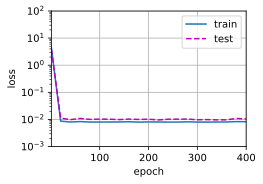

In [35]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the polynomial features
train(poly_features[:n_train, :4],poly_features[n_train:, :4],labels[:n_train],labels[n_train:])

### 以线性函数拟合（欠拟合）

true_weight: tensor([ 5.0000,  1.2000, -3.4000,  5.6000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000])
weight: [[3.6511986 3.9544451]]


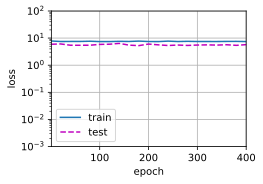

In [36]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

### 以更高阶函数拟合（过拟合）

true_weight: tensor([ 5.0000,  1.2000, -3.4000,  5.6000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000])
weight: [[ 5.0111      1.1961406  -3.3816714   5.671279   -0.2315248  -0.24117897
   0.9615244  -0.20211649  0.4369585  -0.21312478 -0.17635791 -0.21493845
   0.14360765 -0.19876365 -0.02136888  0.20059507  0.03382254 -0.18212385
   0.08627028  0.18509601]]


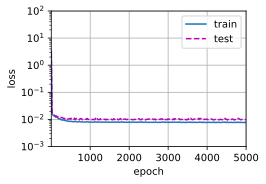

In [38]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=5000)

# 操！过拟合并不明显

## 14. 权重衰退

模型容量由两个因素决定：(1)参数数量；(2)参数的范围。当模型在某个数据集上过拟合时，应当减小模型的容量。权重衰退在损失函数中加入模型参数的$L_2$正则项，最小化损失函数的同时逐渐减小模型参数的取值范围，从而达到降低模型容量的目的。

$$
L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$$

$$
L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,
$$

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

下面以高维线性回归演示权重衰退

$$
y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2), d=200.
$$

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 合成数据
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5 # 将训练样本设小一点更好演示过拟合
true_w, true_b = torch.ones((num_inputs,1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)

In [3]:
# 定义随机初始化模型参数的函数
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]

In [4]:
# 定义L2范式惩罚项
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [6]:
# 定义模型训练函数
def train(lambd):
    """lambda为l2惩罚项因子"""
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X),y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print('L2 norm of w: ',torch.norm(w).item())

L2 norm of w:  13.249513626098633


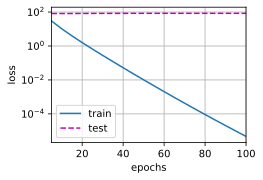

In [7]:
# 将lambd设为0模拟不进行权重衰退时面对过拟合的情况
train(lambd=0)

L2 norm of w:  0.37803834676742554


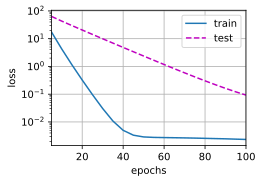

In [8]:
# 使用权重衰退
train(lambd=3)

In [13]:
# 在PyTorch框架中，权重衰退一般实现在优化器内部
def train_concise(lambd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # bias参数不进行衰减
    trainer = torch.optim.SGD([{"params":net[0].weight,'weight_decay':lambd},{"params":net[0].bias}],lr=lr)
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch +1, (d2l.evaluate_loss(net, train_iter,loss),d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of W', net[0].weight.norm().item())

L2 norm of W 0.15941479802131653


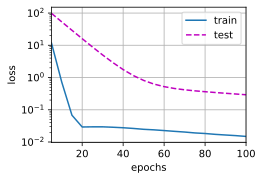

In [16]:
train_concise(lambd=5)

## 15. Dropout

另一种对神经网络进行正则化的技术是Dropout，它以一定的概率 $p$ 将神经元的输出置为 $0$ ， $1-p$ 的概率置为 $\frac{1}{1-p}$ 。

$$
\begin{split}\begin{aligned}
h' =
\begin{cases}
    0 & \text{ with probability } p \\
    \frac{h}{1-p} & \text{ otherwise}
\end{cases}
\end{aligned}\end{split}
$$

In [17]:
import torch 
from torch import nn 
from d2l import torch as d2l 

#自定义Dropout层
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X) # 将所有元素值为0
    if dropout == 0:
        return X # 保留所有元素
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [19]:
X = torch.arange(16, dtype=torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X,0.5))
print(dropout_layer(X,1.0))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  6.,  0., 10., 12.,  0.],
        [16.,  0., 20., 22.,  0., 26.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [21]:
# 以Fashion-MNIST图像分类演示Dropout的效果
# 定义模型
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, dropout1=0., dropout2=0.,is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.linear1 = nn.Linear(num_inputs, num_hiddens1)
        self.linear2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.linear3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.linear1(X.reshape((-1,self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1) # Dropout仅在训练时使用
        H2 = self.relu(self.linear2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.linear3(H2)
        return out

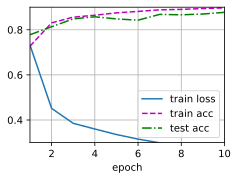

In [22]:
# 不适用Dropout
dropout1, dropout2 = 0.0, 0.0
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2,dropout1,dropout2,is_training=True)

# 训练
num_epochs, lr, batch_size = 10, 0.5, 128

loss = nn.CrossEntropyLoss()

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

trainer = torch.optim.SGD(net.parameters(),lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,trainer)

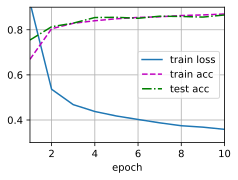

In [23]:
# 不适用Dropout
dropout1, dropout2 = 0.2, 0.5
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2,dropout1,dropout2,is_training=True)

# 训练
num_epochs, lr, batch_size = 10, 0.5, 128

loss = nn.CrossEntropyLoss()

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

trainer = torch.optim.SGD(net.parameters(),lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,trainer)

In [26]:
# Dropout的PyTorch实现
net = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
    nn.Dropout(0.2),nn.Linear(256,256),nn.ReLU(),
    nn.Dropout(0.5),nn.Linear(256,10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

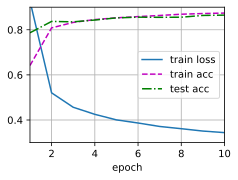

In [27]:
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)